[Table of Contents](table_of_contents.ipynb)

# Topic 4.  Linear Independence

Author: Zheng Sun (zsun2@byu.edu)
    

##  Introduction

A subset of a vector space is **linearly independent** if none of its elements can be written as a *linear combination* of the others.

Together with *linear combination*, *spanning*, and *basis*, **linear independence** is a fundamental concept in *vector spaces* theory.

## Explanation of the theory

### Definition

Let $S$ be a vector space, and let $T$ be a subset of $S$. The set $T$ is **linearly independent** if for each finite nonempty subset of $T$ (say $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$) the only set of scalars satisfying the equation

$$c_1\mathbf{p}_1 + c_2\mathbf{p}_2 + \cdots + c_m\mathbf{p}_m = 0$$

is the trivial solution $c_1 = c_2 = \cdots = c_m = 0$.


The set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is said to be **linearly dependent** if there exists a set of scalar coefficients $\{c_1, c_2, \cdots, c_m\}$ which are not all zero, such that $c_1\mathbf{p}_1 + c_2\mathbf{p}_2 + \cdots + c_m\mathbf{p}_m = 0$.

Note that linear dependence/independence is a concept that applies to a collection of vectors, not to a single vector, or to one vector in the presence of some others.

### Matrix notation

The set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is linearly independent if and only if the matrix $\mathbf{A}$ with columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ has a pivot in every column, if and only if $\mathbf{Ac} = 0$ has only the trivial solution ($\mathbf{c} = [c_1, c_2, \cdots, c_m]^T$).

Solving the matrix equation $\mathbf{Ac} = 0$ will either verify that the columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ are linearly independent, or produce a linear dependence relation by substituting any nonzero values for the free variables.

### Other facts

- Any set containing the zero vector is linearly dependent.

- Two vectors are linearly dependent if and only if they are collinear.

- A set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is linearly independent if and only if the rank of the matrix $\mathbf{A}$ with columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ is $m$.

## Simple Numerical Examples

In [1]:
# Import modules for linear algebra
import numpy as np
import sympy
sympy.init_printing()

### Example 1

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\2\end{pmatrix}, \begin{pmatrix}3\\4\end{pmatrix}\end{Bmatrix}$ linearly independent?

Firstly, we form a matrix equation:

$$\begin{bmatrix}1&3\\2&4\end{bmatrix}\begin{bmatrix}c_1\\c_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$$

It implies that $\begin{cases}{c_1 + 3c_2 = 0\\2c_1 + 4c_2 = 0}\end{cases}$.

As this simultaneous equation has no nonzero solution, $\begin{Bmatrix}\begin{pmatrix}1\\2\end{pmatrix}, \begin{pmatrix}3\\4\end{pmatrix}\end{Bmatrix}$ is linearly independent.

### Example 2

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\2\\3\end{pmatrix}, \begin{pmatrix}2\\4\\6\end{pmatrix}\end{Bmatrix}$ linearly independent?

The matrix equation is:

$$\begin{bmatrix}1&2\\2&4\\3&6\end{bmatrix}\begin{bmatrix}c_1\\c_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$$

We can try solving this equation, like what we do in last example. Also, we can use *Gaussian elimination* (also known as *row reduction*) to find the rank of matrix $\begin{bmatrix}1&2\\2&4\\3&6\end{bmatrix}$ ($\mathbf{A}$).

For simplicity, we do not implement *Gaussian elimination* from scratch here, just use an inner method `rref()` in SymPy `Matrix` object. `rref()` returns a tuple of two elements, the first is the reduced row echelon form (RREF), and the second is a tuple of indices of the pivot columns.

Rank of A = 1
RREF of A = 


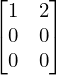

In [2]:
A = sympy.Matrix([[1,2], [2,4], [3,6]])
rref, idx = A.rref()

print("Rank of A = {}".format(len(idx)))
print("RREF of A = ")
display(rref)

As the result shows, the rank of $\mathbf{A}$ is 1, less than 2, the number of columns. Therefore, $\begin{Bmatrix}\begin{pmatrix}1\\2\\3\end{pmatrix}, \begin{pmatrix}2\\4\\6\end{pmatrix}\end{Bmatrix}$ is linearly dependent.

### Example 3

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\1\\-2\end{pmatrix}, \begin{pmatrix}1\\-1\\2\end{pmatrix}, \begin{pmatrix}3\\1\\4\end{pmatrix}\end{Bmatrix}$ linearly independent?

The matrix $\mathbf{A}$ is $\begin{bmatrix}1&1&3\\1&-1&1\\-2&2&4\end{bmatrix}$. Just do *Gaussian elimination* on $\mathbf{A}$.

Rank of A = 3
RREF of A = 


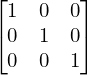

In [3]:
A = sympy.Matrix([[1,1,3], [1,-1,1], [-2,2,4]])
rref, idx = A.rref()

print("Rank of A = {}".format(len(idx)))
print("RREF of A = ")
display(rref)

It shows that, the rank of $\mathbf{A}$ is 3, equal to the number of columns. Therefore, $\begin{Bmatrix}\begin{pmatrix}1\\1\\-2\end{pmatrix}, \begin{pmatrix}1\\-1\\2\end{pmatrix}, \begin{pmatrix}3\\1\\4\end{pmatrix}\end{Bmatrix}$ is linearly independent.

## An Engineering Application

Let us look at a chemical engineering application.

> The following reactions are proposed in the hydrogenation of bromine:
> 
> $$\begin{align*}H_2 + Br_2 &\rightleftharpoons 2HBr\\
Br_2 &\rightleftharpoons 2Br\\
Br + H_2 &\rightleftharpoons HBr + H\\
H + Br_2 &\rightleftharpoons HBr + Br\\
H + HBr &\rightleftharpoons H_2 + Br\\
2Br &\rightleftharpoons Br_2\end{align*}$$
> 
> We can find out a set of independent reactions from these reactions.

Firstly, we create a species vector $\mathbf{c} = [H_2, H, Br_2, Br, HBr]^T$, and a stoichiometric coefficients matrix $\mathbf{A}$. Each row in $\mathbf{A}$ represents a reaction with negative coefficients for reactants, and positive coefficients for products. A coefficient of zero denotes species not participating in the reaction. Then, 6 given reactions can be represented by $\mathbf{A}*\mathbf{c}$.

A = 


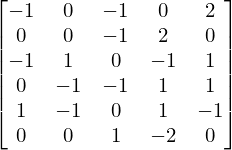

In [4]:
labels = ['H2', 'H', 'Br2', 'Br', 'HBr']

#    {H2, H, Br2, Br, HBr}
A = [[-1,  0, -1,  0,  2],  # H2 + Br2 = 2HBr
     [ 0,  0, -1,  2,  0],  # Br2 = 2Br
     [-1,  1,  0, -1,  1],  # Br + H2 = HBr + H
     [ 0, -1, -1,  1,  1],  # H + Br2 = HBr + Br
     [ 1, -1,  0,  1,  -1], # H + HBr = H2 + Br
     [ 0,  0,  1, -2,  0]]  # 2Br = Br2

# convert A to Matrix object
A = sympy.Matrix(A)

print("A = ")
display(A)

As we know, there are three types of elementary row operations for *Gaussian elimination*:

* Swapping two rows
* Multiplying a row by a nonzero number
* Adding a multiple of one row to another row

For a stoichiometric coefficients matrix, these operations are all reasonable. Let us do *Gaussian elimination* on $\mathbf{A}$.

RREF of A = 


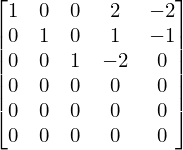

In [5]:
# Put A into RREF
rref, idx = A.rref()

print("RREF of A = ")
display(rref)

The RREF matrix $\mathbf{A}_{RREF}$ shows that there are only 3 independent columns. The independent reactions are defined by $\mathbf{A}_{RREF}*\mathbf{c}$.

In [6]:
# Find out independent reactions
for row in rref.tolist():
    
    s = "0 = "
    for coeff, species in zip(row, labels):
        if coeff != 0:
            s += "{0:+d}{1} ".format(int(coeff), species)
    
    if len(s) != 4:
        print(s)

0 = +1H2 +2Br -2HBr 
0 = +1H +1Br -1HBr 
0 = +1Br2 -2Br 


It is done! But the answer is not unique, the order of rows and elementary row operations can change it.

## References

1. Moon, Todd K., and Wynn C. Stirling. Mathematical methods and algorithms for signal processing. No. 621.39: 51 MON. 2000.

2. https://en.wikipedia.org/wiki/Linear_independence

3. https://en.wikipedia.org/wiki/Gaussian_elimination

4. https://docs.sympy.org/latest/tutorial/index.html

5. https://textbooks.math.gatech.edu/ila/linear-independence.html

6. http://kitchingroup.cheme.cmu.edu/blog/2013/03/01/Determining-linear-independence-of-a-set-of-vectors/

7. http://immersivemath.com/ila/ch05_gausselim/ch05.html